# Matrix Factorization for Recommendation System

For the matrix factorization, we implement three popular algorithms: alternating Least Square (ALS), gradient descent (GD), and stochastic gradient descent (SGD) on the simulated data and MovieLens data. 

### 1. Simulated Dataset

In [6]:
import sys
sys.path.append('../src/')

In [7]:
from data import simulate_matrix_data

In [10]:
# Example usage
Y_complete, Y_train, Y_test = simulate_matrix_data(m=100, n=80, J=5, testfrac=0.2)

In [11]:
Y_train.shape

(100, 80)

In [12]:
Y_test.shape

(100, 80)

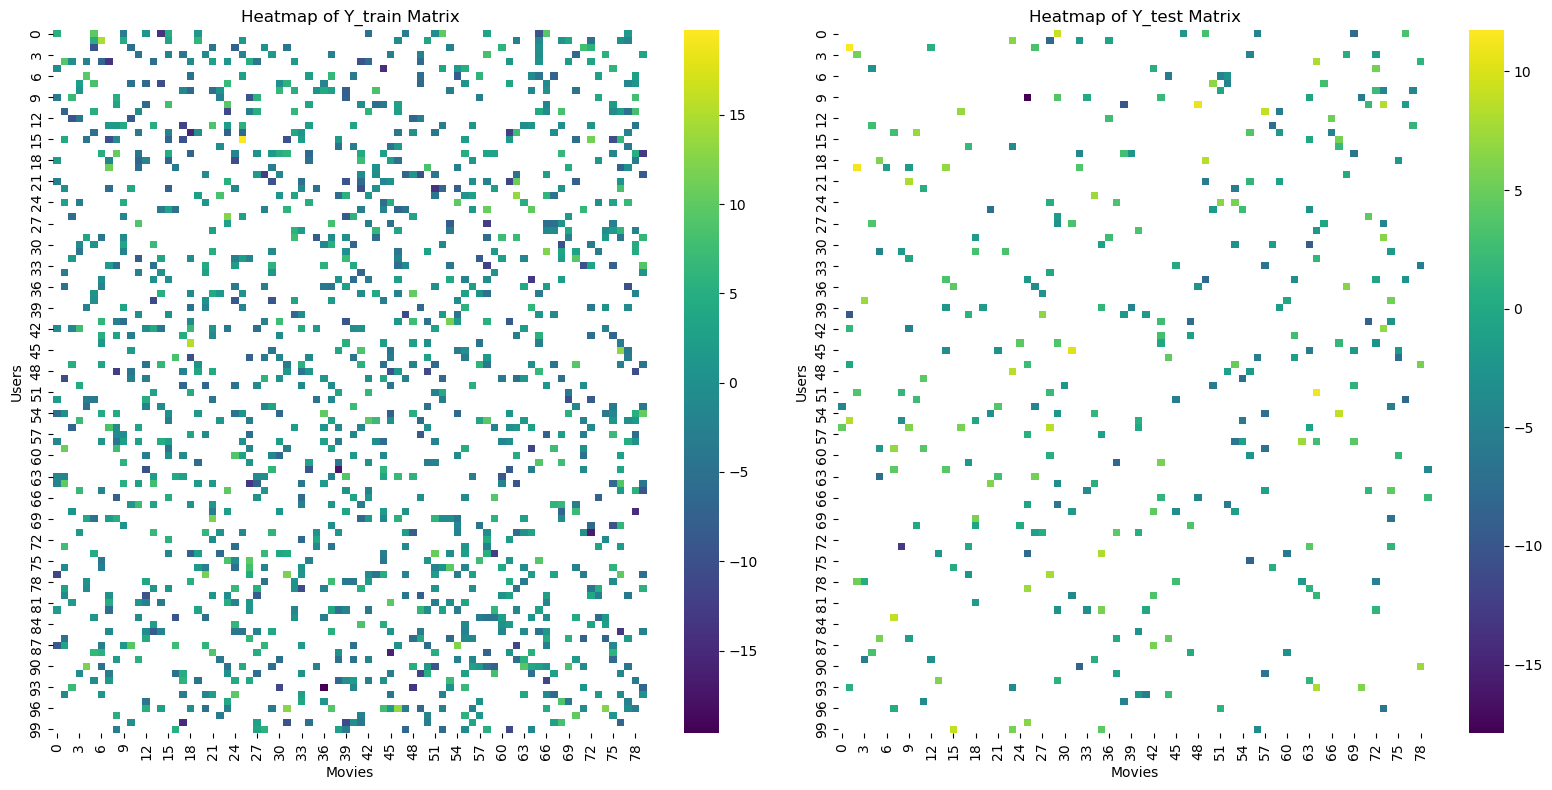

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Visualize Y_train
sns.heatmap(Y_train, cmap="viridis", cbar=True, ax=axes[0])
axes[0].set_title('Heatmap of Y_train Matrix')
axes[0].set_xlabel('Movies')
axes[0].set_ylabel('Users')

# Visualize Y_test
sns.heatmap(Y_test, cmap="viridis", cbar=True, ax=axes[1])
axes[1].set_title('Heatmap of Y_test Matrix')
axes[1].set_xlabel('Movies')
axes[1].set_ylabel('Users')

# Display the plot
plt.tight_layout()
plt.show()


####  `ALS on Simulated Data`

In [8]:
from algorithm import matrix_factorization_als

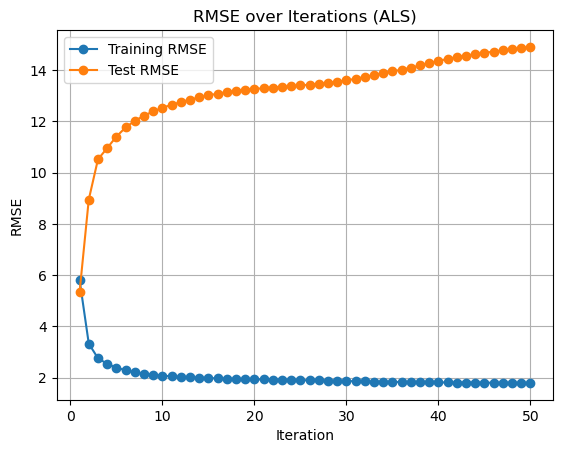

In [45]:
# Apply ALS Matrix Factorization on Simulated Data
r = 5  # Latent factors
lambda_reg = 0.1  # Regularization strength
iterations = 50  # Number of iterations

X_est, Y_est, RMSE_train, RMSE_test = matrix_factorization_als(Y_train, Y_test, r=r, lambda_reg=lambda_reg, iterations=iterations)

# Plot the RMSE for training and test data over iterations
plt.plot(np.arange(1, iterations + 1), RMSE_train, marker='o', label='Training RMSE')
plt.plot(np.arange(1, iterations + 1), RMSE_test, marker='o', label='Test RMSE')
plt.title('RMSE over Iterations (ALS)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


#### `GD on Simulated Data`

In [46]:
from algorithm import matrix_factorization_gd

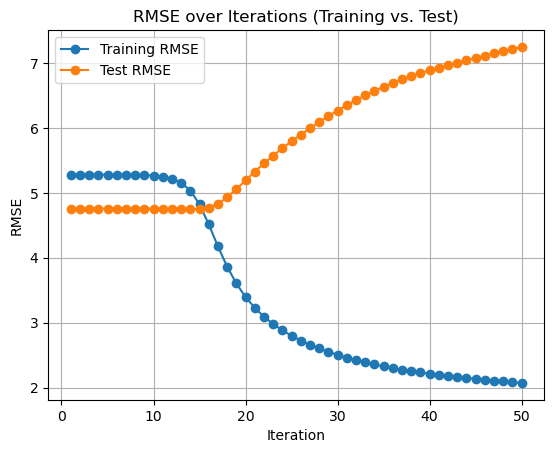

In [47]:

# Apply Matrix Factorization on Simulated Data
r = 5  # Latent factors
eta = 0.01  # Learning rate
lambda_reg = 0.1  # Regularization strength
iterations = 50  # Number of iterations

X_est, Y_est, RMSE_train, RMSE_test = matrix_factorization_gd(Y_train, Y_test, r=r, eta=eta, lambda_reg=lambda_reg, iterations=iterations)

# Plot the RMSE for training and test data over iterations
plt.plot(np.arange(1, iterations + 1), RMSE_train, marker='o', label='Training RMSE')
plt.plot(np.arange(1, iterations + 1), RMSE_test, marker='o', label='Test RMSE')
plt.title('RMSE over Iterations (Training vs. Test)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


#### `SGD on Simulated Data`

In [13]:
from algorithm import matrix_factorization_sgd

In [14]:
# Create training data indices
train_data = np.array([(i, j) for i in range(Y_train.shape[0]) for j in range(Y_train.shape[1]) if not np.isnan(Y_train[i, j])])

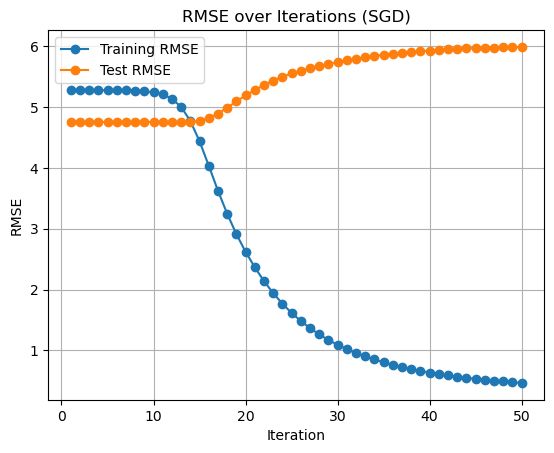

In [15]:
# Apply Matrix Factorization on Simulated Data using SGD
r = 15  # Latent factors
eta = 0.01  # Learning rate
lambda_reg = 0.1  # Regularization strength
iterations = 50  # Number of iterations

X_est, Y_est, RMSE_train, RMSE_test = matrix_factorization_sgd(Y_train, Y_test, train_data, r=r, eta=eta, lambda_reg=lambda_reg, iterations=iterations)

# Plot the RMSE for training and test data over iterations
plt.plot(np.arange(1, iterations + 1), RMSE_train, marker='o', label='Training RMSE')
plt.plot(np.arange(1, iterations + 1), RMSE_test, marker='o', label='Test RMSE')
plt.title('RMSE over Iterations (SGD)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

### 2. MovieLens Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data from the MovieLens dataset
data = pd.read_csv('../data/u.txt', sep='\t', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])

# Split data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create the user-item matrices with NaN values
num_users = data['userId'].max()
num_movies = data['movieId'].max()

# Initialize the matrices with NaN
M_train = np.full((num_users, num_movies), np.nan)
M_test = np.full((num_users, num_movies), np.nan)

# Populate the user-item matrices for the training set
for _, row in train_data.iterrows():
    M_train[int(row['userId']) - 1, int(row['movieId']) - 1] = row['rating']

# Populate the user-item matrices for the test set
for _, row in test_data.iterrows():
    M_test[int(row['userId']) - 1, int(row['movieId']) - 1] = row['rating']

m, n = M_train.shape

# Function to get indices of non-missing entries for a given user
def R1(i):
    return np.where(~np.isnan(M_train[i, :]))[0]

# Function to get indices of non-missing entries for a given movie
def R2(j):
    return np.where(~np.isnan(M_train[:, j]))[0]



In [3]:
data.shape

(100000, 4)

In [4]:
data.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
M_train.shape

(943, 1682)

In [ ]:
M_test.shape

(943, 1682)

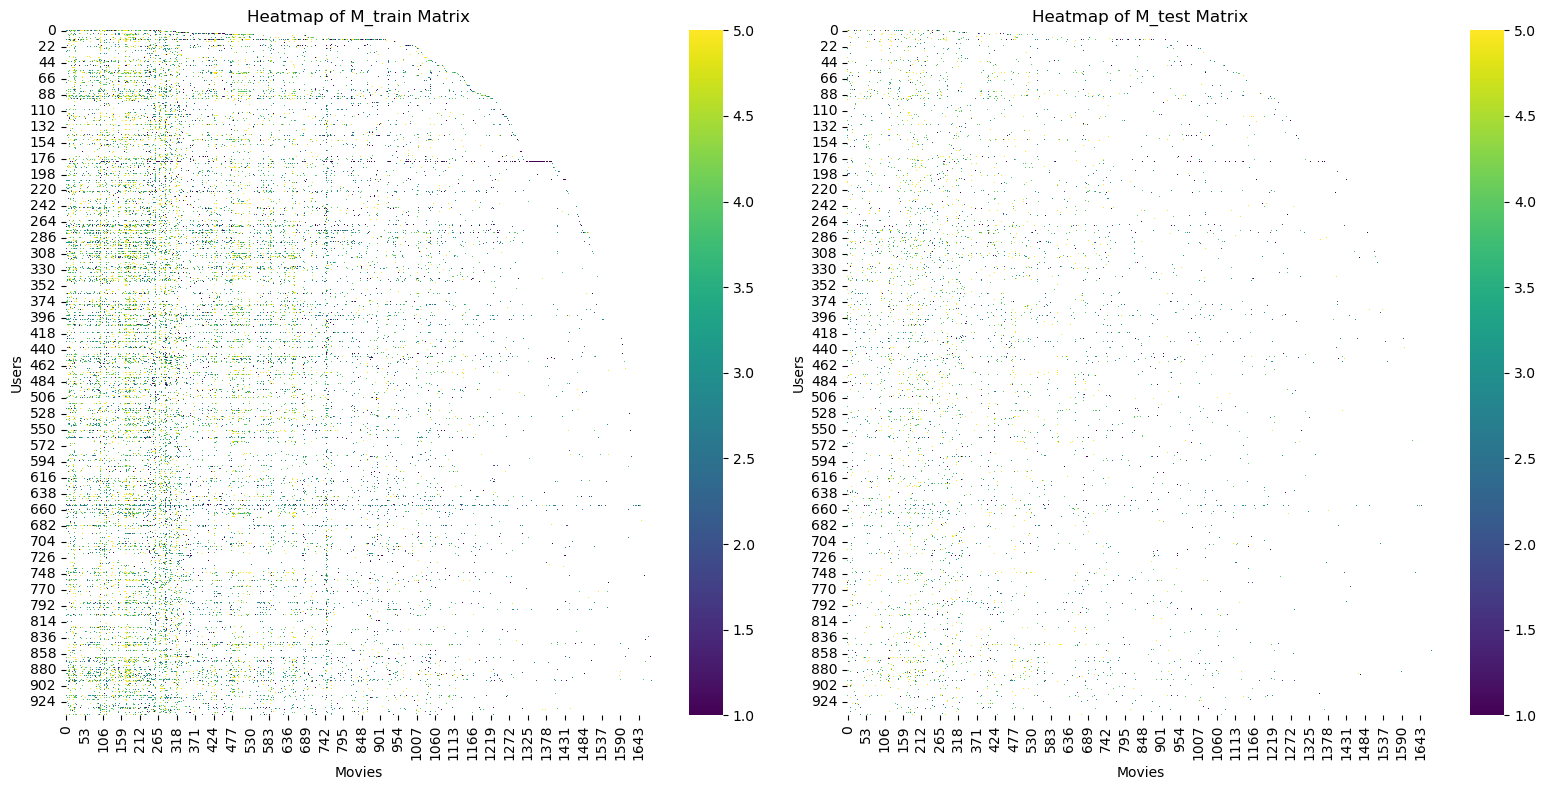

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Visualize M_train
sns.heatmap(M_train, cmap="viridis", cbar=True, ax=axes[0])
axes[0].set_title('Heatmap of M_train Matrix')
axes[0].set_xlabel('Movies')
axes[0].set_ylabel('Users')

# Visualize Y_test
sns.heatmap(M_test, cmap="viridis", cbar=True, ax=axes[1])
axes[1].set_title('Heatmap of M_test Matrix')
axes[1].set_xlabel('Movies')
axes[1].set_ylabel('Users')

# Display the plot
plt.tight_layout()
plt.show()


#### `ALS on MovieLens Data`

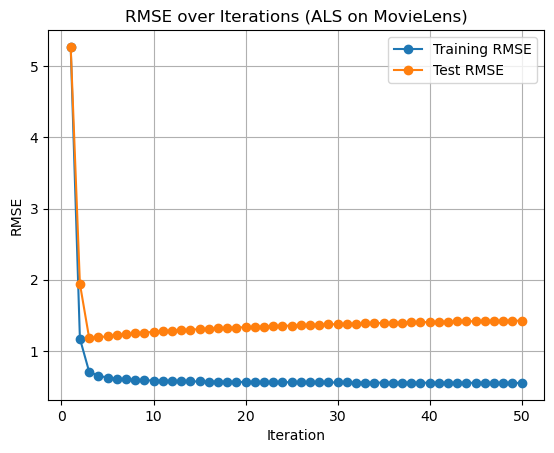

In [ ]:
# Apply ALS Matrix Factorization on MovieLens Data
r = 15  # Latent factors
lambda_reg = 0.1  # Regularization strength
iterations = 50  # Number of iterations

X_est, Y_est, RMSE_train, RMSE_test = matrix_factorization_als(M_train, M_test, r=r, lambda_reg=lambda_reg, iterations=iterations)

# Plot the RMSE for training and test data over iterations
plt.plot(np.arange(1, iterations + 1), RMSE_train, marker='o', label='Training RMSE')
plt.plot(np.arange(1, iterations + 1), RMSE_test, marker='o', label='Test RMSE')
plt.title('RMSE over Iterations (ALS on MovieLens)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

#### `GD on MovieLens Data`

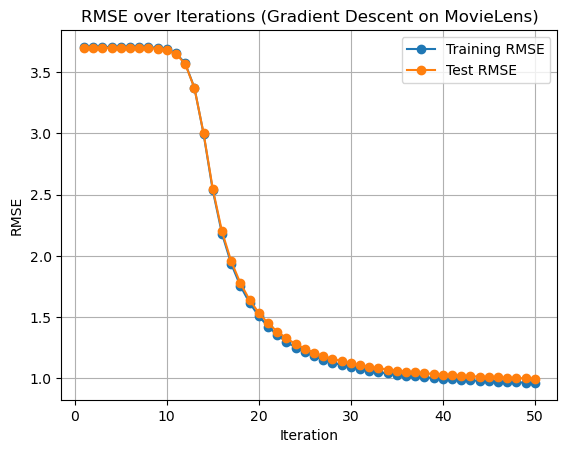

In [ ]:
# Apply Matrix Factorization on MovieLens Data using Gradient Descent
r = 15  # Latent factors
eta = 0.001  # Learning rate
lambda_reg = 0.1  # Regularization strength
iterations = 50  # Number of iterations


X_est, Y_est, RMSE_train, RMSE_test = matrix_factorization_gd(M_train, M_test, r=r, eta=eta, lambda_reg=lambda_reg, iterations=iterations)

# Plot the RMSE for training and test data over iterations
plt.plot(np.arange(1, iterations + 1), RMSE_train, marker='o', label='Training RMSE')
plt.plot(np.arange(1, iterations + 1), RMSE_test, marker='o', label='Test RMSE')
plt.title('RMSE over Iterations (Gradient Descent on MovieLens)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

#### `SGD on MovieLens Data`

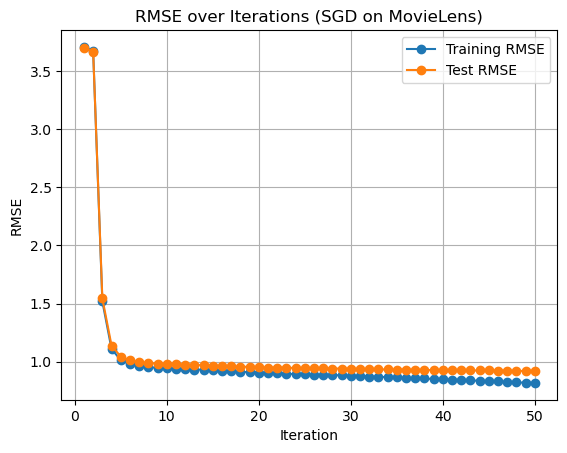

In [ ]:
# Create training data indices (non-NaN entries in M)
train_data_indices = np.array([(i, j) for i in range(M_train.shape[0]) for j in range(M_train.shape[1]) if not np.isnan(M_train[i, j])])

# Apply Matrix Factorization on MovieLens Data using SGD
r = 15  # Latent factors
eta = 0.01  # Learning rate
lambda_reg = 0.1  # Regularization strength
iterations = 50  # Number of iterations

X_est, Y_est, RMSE_train, RMSE_test = matrix_factorization_sgd(M_train, M_test, train_data_indices, r=r, eta=eta, lambda_reg=lambda_reg, iterations=iterations)

# Plot the RMSE for training and test data over iterations
plt.plot(np.arange(1, iterations + 1), RMSE_train, marker='o', label='Training RMSE')
plt.plot(np.arange(1, iterations + 1), RMSE_test, marker='o', label='Test RMSE')
plt.title('RMSE over Iterations (SGD on MovieLens)')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()